# Supermarket Sales Analysis

## Importing Requirements

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

## Viewing the head of the file

In [2]:
df = pd.read_csv('./supermarket_data.csv')

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Describing the columns of the dataset

* Invoice ID => This column has the invoice id
* Branch => It has the branch name
* City => It has the city which the branch is in
* Customer type => It has the type of the customer whether he is a member or a normal customer
* Gender => It has the gender of the customer
* Product line => It has the category of the product that was sold.
* Unit price => It has the price of the item
* Quantity => It has the number of items sold
* Tax 5% => It has the taxes amount
* Total => It has the total price of the invoice
* Date => It has the date of the invoice
* Time => It has the time of the invoice
* Payment => It has the payment method (Cash- Credit card - Ewallet)
* cogs => Cost Of Goods Sold
* gross margin percentage => It has the gross margin in percetage (%)
* gross income => It has the gross income from that invoice
* Rating => It has the customer's rating

## Checking that the DataFrame doesn't have null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

#### Since all columns have 1000 not-null then there are no null values

## The questions we want to solve?

1- Which is the most selling branch?  
2- What city has the most sales?  
3- What is the most buying customer type?  
4- What is the most buying gender?  
5- What types of products each gender buy and how many times they bought it?  
6- What is the most selling product line?  
7- How much is the total gross income for each product line?  
8- The number of units sold in each product line   
9- The total taxes that the supermarket needs to pay to government  
10- What is the most used payment method?  
11- The total cogs that we spent  
12- The total gross income we earned  
13- The average customer rating

## 1- Which is the most selling branch?

### Knowing what branches exist in the dataset

In [4]:
df.Branch.unique()

array(['A', 'C', 'B'], dtype=object)

**So this supermarket has three branches:**  
* A
* B
* C

### Finding out how many times each branch sold

In [5]:
df.Branch.value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

**From the previous result we found out that:**
* Branch "A" is the most selling branch. It made 340 invoices.
* Branch "B" is in the second place. It made 332 invoices.
* Branch "C" is in the third place. It made 328 invoices.

## 2- What city has the most sales?

### Knowing what cities we are in

In [6]:
df.City.unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

**So we found out that we exist in three cities:**
* Yangon
* Naypyitaw
* Mandalay

### Finding out how many invoices were made in each city

In [7]:
df.City.value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

**From the previous result, We found that:**
* Yangon is the most selling city. It made 340 invoices.
* Mandalay is in the second place. It made 332 invoices.
* Naypyitaw is in the third place. It made 328 invoices.

### Visualization

**Visualizing the number of invoices made in each city**

In [42]:
data_for_cities_fig = {
    'Health and beauty': 2342,
    'Electronic accessories': 2587,
    'Home and lifestyle': 2564,
    'Sports and travel': 2624,
    'Food and beverages': 2673,
    'Fashion accessories': 2585
}

fig_cities_x = list(data_for_cities_fig.keys())
fig_cities_y = list(data_for_cities_fig.values())

# Creating a new figure

fig1 = plt.figure(figsize = (9,8))

<Figure size 900x800 with 0 Axes>

Text(0.5, 1.05, 'Gross income generated by each product line')

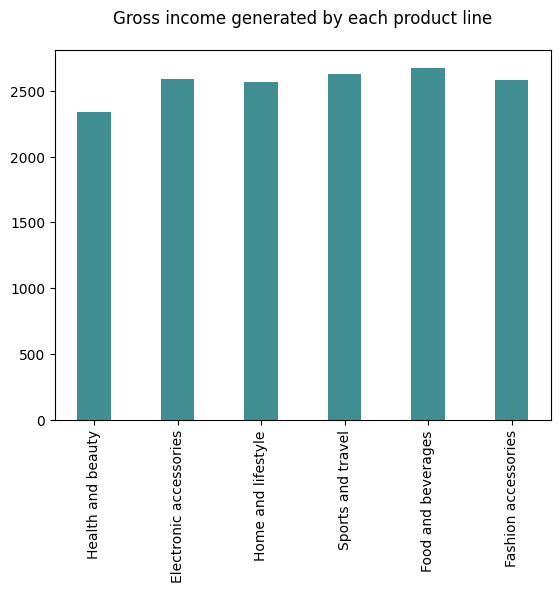

In [44]:
plt.bar(fig_cities_x, fig_cities_y, color = '#408E91', width = 0.4)
plt.tick_params(axis = 'x', labelrotation = 90)
plt.title("Gross income generated by each product line", y=1.05)

## 3- What is the most buying customer type?

### Fidning out what customer types does the supermarket have?

In [8]:
df['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

**So our buyers are divided in two types:**
* They can be members. or
* They can be normal customers.

### Finding out how many times each customer type bought?

In [9]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

**The result says that:**
* Members are buying from us more than normal customers. They bought 501 times. 
* Normal customers bought 499 times.  

**It's not a big difference, So In my opinion, We shouldn't do any thing.**

## 4- What is the most buying gender?

### Finding out what genders buy from us

In [10]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

**So Both genders are buying from us.**

### Finding out how many times each gender bought?

In [11]:
df.Gender.value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

#### From the previous result, we found that:
* Females bought more than males. They bought 501 times.
* Males bought 499 times.  

**It is not a big difference so we don't have to do anything about that**

## 5- What types of products each gender buy and how many times they bought it?  

### Analyzing Females Data

#### Filtering the product line table so it only has the records that females bought

In [12]:
females = df.query('Gender=="Female"')['Product line']

females

0           Health and beauty
1      Electronic accessories
6      Electronic accessories
7          Home and lifestyle
8           Health and beauty
                ...          
990        Food and beverages
991         Sports and travel
994    Electronic accessories
996        Home and lifestyle
999       Fashion accessories
Name: Product line, Length: 501, dtype: object

#### Knowing what product lines females buy

In [13]:
print(females.unique())

['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Food and beverages' 'Fashion accessories' 'Sports and travel']


**Females buys these product lines**

* Health and beauty
* Electronic accessories
* Home and lifestyle
* Food and beverages
* Fashion accessories
* Sports and travel

#### Knowing how many times females bought each product line

In [14]:
females.value_counts()

Fashion accessories       96
Food and beverages        90
Sports and travel         88
Electronic accessories    84
Home and lifestyle        79
Health and beauty         64
Name: Product line, dtype: int64

**From the previous output we found that:**
* Fashion accessories is the most product line that females buy. They bought it 96 times.
* Females bought food and beverages 90 times.
* Females bought sports and travel 88 times.
* Females bought electronic accessories 84 times.
* Females bought home and lifestyle 79 times
* Females bought Health and beauty 64 times.

### Analyzing males data

#### Filtering the product line table so it only has the records that females bought

In [15]:
males = df.query('Gender=="Male"')['Product line']

males

2          Home and lifestyle
3           Health and beauty
4           Sports and travel
5      Electronic accessories
11     Electronic accessories
                ...          
992    Electronic accessories
993       Fashion accessories
995         Health and beauty
997        Food and beverages
998        Home and lifestyle
Name: Product line, Length: 499, dtype: object

#### Knowing what product lines males buy

In [16]:
males.unique()

array(['Home and lifestyle', 'Health and beauty', 'Sports and travel',
       'Electronic accessories', 'Food and beverages',
       'Fashion accessories'], dtype=object)

**Males buy these product lines:**
* Home and lifestyle
* Health anf beauty
* Sports and travel
* Electronic accessories
* Food and beverages
* Fashion accessories

#### Knowing how many times males bought each product line

In [17]:
males.value_counts()

Health and beauty         88
Electronic accessories    86
Food and beverages        84
Fashion accessories       82
Home and lifestyle        81
Sports and travel         78
Name: Product line, dtype: int64

**From the previous result we found that:**
* Health and beauty is the most product line that males bought. They bought it 88 times.
* Males bought electronic accessories 86 times.
* Males bought food and beverages 84 times.
* Males bought fashion accessories 82 times.
* Males bought home and lifestyle 81 times.
* Males bought sports and travel 78 times.

## 6- What is the most selling product line?

### Finding out what product lines do we have

In [18]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

#### We have 6 product lines in the supermarket:
* Health and beauty
* Electronic accessories
* Home and lifestyle
* Sports and travel
* Food and beverages
* Fashion accessories

### Finding how much each product line sells

In [19]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

#### From the previous output we find that:
* Fashion accessories is the most selling product line. It was sold 178 times.
* Food and beverages were sold 174 times.
* Electronic accessories were sold 170 times.
* Sports and travel were sold 166 times.
* Home and lifestyle were sold 160 times.
* Health and beauty were sold 152 times.

## 7- How much is the total gross income for each product line?

### Health and beauty

In [20]:
health_and_beauty_income = sum(df['gross income'][df['Product line'] == 'Health and beauty'])

health_and_beauty_income

2342.5589999999993

**From the previous output we found that the health and beauty product line generated about $2342 as a gross income**

### Electronic accessories

In [21]:
electronic_accessories_income = sum(df['gross income'][df['Product line'] == 'Electronic accessories'])

electronic_accessories_income

2587.5015000000017

**From the previous output we found that the electronic accessories product line generated about $2587 as a gross income**

### Home and lifestyle

In [22]:
home_and_lifestyle_income = sum(df['gross income'][df['Product line'] == 'Home and lifestyle'])

home_and_lifestyle_income

2564.853000000002

**From the previous output we found that the home and lifestyle product line generared about $2564 as a gross income**

### Sports and travel

In [23]:
sports_and_travel_income = sum(df['gross income'][df['Product line'] == 'Sports and travel'])

sports_and_travel_income

2624.8964999999994

**From the previous output we found that the sports and travel product line generated about $2624 as a gross income**

### Food and beverages

In [24]:
food_income = sum(df['gross income'][df['Product line'] == 'Food and beverages'])

food_income

2673.5639999999994

**From the previous output we found that the food and beverages product line generated $2673 as a gross income**

### Fashion accessories

In [25]:
fashion_income = sum(df['gross income'][df['Product line'] == 'Fashion accessories'])

fashion_income

2585.995

**From the previous output we found that the fashion accessories product line generated $2585 as a gross income**

**From the following analysis we found that the food and beverages generated the biggest gross income**

### Visualization

#### Creating the plot resources

In [36]:
data_for_fig1 = {
    'Health and beauty': 2342,
    'Electronic accessories': 2587,
    'Home and lifestyle': 2564,
    'Sports and travel': 2624,
    'Food and beverages': 2673,
    'Fashion accessories': 2585
}

fig1_x = list(data_for_fig1.keys())
fig1_y = list(data_for_fig1.values())

# Creating a new figure

fig1 = plt.figure(figsize = (9,8))


<Figure size 900x800 with 0 Axes>

#### Creating the bar plot

Text(0.5, 1.05, 'Gross income generated by each product line')

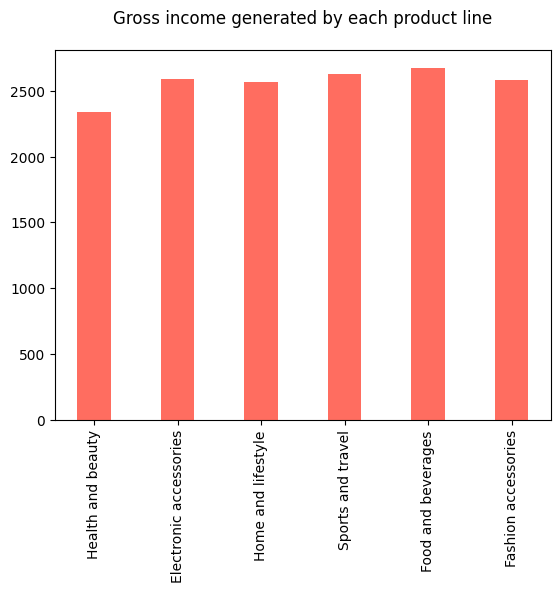

In [37]:
plt.bar(fig1_x, fig1_y, color = '#FF6D60', width = 0.4)
plt.tick_params(axis = 'x', labelrotation = 90)
plt.title("Gross income generated by each product line", y=1.05)

## 8- The number of units sold in each product line

### Health and beauty

In [28]:
health_and_beauty_units = sum(df['Quantity'][df['Product line'] == 'Health and beauty'])

health_and_beauty_units

854

#### We sold 854 units in the health and beauty product line

### Electronic accessories

In [29]:
electronic_units = sum(df['Quantity'][df['Product line'] == 'Electronic accessories'])

electronic_units

971

#### We sold 971 units in the electronic accessories product line

### Home and lifestyle

In [30]:
home_and_lifestyle_units = sum(df['Quantity'][df['Product line'] == 'Home and lifestyle'])

home_and_lifestyle_units

911

#### We sold 911 units in the home and lifestyle product line

### Sports and travel

In [31]:
sports_and_travel_units = sum(df['Quantity'][df['Product line'] == 'Sports and travel'])

sports_and_travel_units

920

#### We sold 920 units in the sports and lifestyle product line

### Food and beverages

In [32]:
food_and_beverages_units = sum(df['Quantity'][df['Product line'] == 'Food and beverages'])

food_and_beverages_units

952

#### We sold 952 units in the food and beverages product line

### Fashion accessories

In [33]:
fashion_accessories_units = sum(df['Quantity'][df['Product line'] == 'Fashion accessories'])

fashion_accessories_units

902

#### We sold 902 units in the fashion accessories product line

### Visualization

In [39]:
data_for_fig2 = {
    'Health and beauty': 854,
    'Electronic accessories': 971,
    'Home and lifestyle': 911,
    'Sports and travel': 920,
    'Food and beverages': 952,
    'Fashion accessories': 902
}

fig2_x = list(data_for_fig2.keys())
fig2_y = list(data_for_fig2.values())

# Creating a new figure

fig2 = plt.figure(figsize = (9,8))

<Figure size 900x800 with 0 Axes>

Text(0.5, 1.05, 'Number of units sold for each product line')

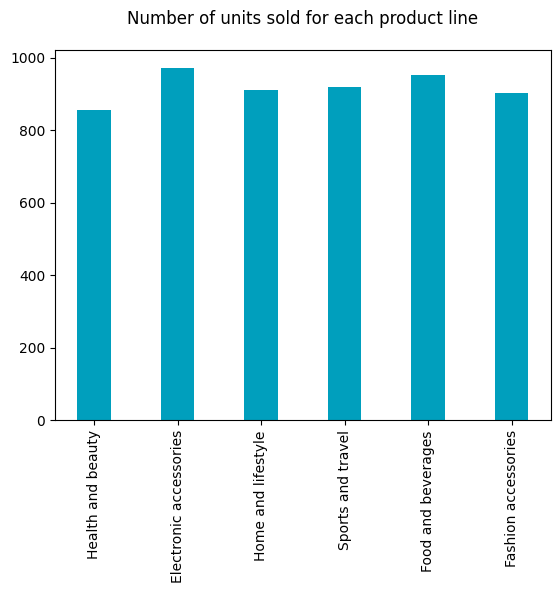

In [40]:
plt.bar(fig2_x, fig2_y, color = '#009FBD', width = 0.4)
plt.tick_params(axis = 'x', labelrotation = 90)
plt.title("Number of units sold for each product line", y=1.05)

## 9- The total taxes that the supermarket needs to pay to government

This will be done by calculating the sum of the "Tax 5%" column

In [46]:
total_taxes = sum(df["Tax 5%"])

total_taxes

15379.369000000002

**From the previous output we found that the supermarket should pay about $15379 as taxes to the government**

## 10- What is the most used payment method?

### Knowing what payment methods we have

In [47]:
df["Payment"].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

**So the supermarket has three payment methods**
* Cash
* Credit Card
* Ewallet

### Calculating how many times each method has been used

In [49]:
df["Payment"].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

**From the previous output we found that**
* Ewallet is the most used payment method. It has been used 345 times.
* Cash is in the second place. It has been used 344 times.
* Credit card is in the third place. It has been used 311 times.

### Visualization

In [54]:
data_for_fig4 = {
    'Ewallet': 345,
    'Cash': 344,
    'Credit card': 311
}

fig4_x = list(data_for_fig4.keys())
fig4_y = list(data_for_fig4.values())

# Creating a new figure

fig2 = plt.figure(figsize = (9,8))

<Figure size 900x800 with 0 Axes>

Text(0.5, 1.05, 'Number of units sold for each product line')

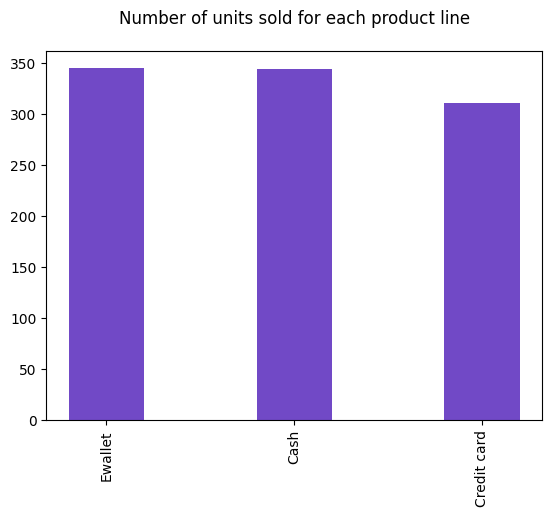

In [55]:
plt.bar(fig4_x, fig4_y, color = '#7149C6', width = 0.4)
plt.tick_params(axis = 'x', labelrotation = 90)
plt.title("Number of units sold for each product line", y=1.05)

## 11- The total cogs that we spent

In [58]:
total_cogs = sum(df.cogs)

total_cogs

307587.38000000035

**We found that the total cogs equals about $307587**

## 12- The total gross income we earned

In [59]:
total_gross_income = sum(df['gross income'])

total_gross_income

15379.369000000002

**The total gross income we earned equals about $15379**

## 13- The average customer rating

In [62]:
average_customer_rating = round(df.Rating.mean())

average_customer_rating

7

**From the previous result we found that the average customer rating is about 7**

----------------------------------------------------------------------------------
**So now we finished the analysis process for the supermarket**

#### Made by: Khaled Amir